In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

import sklearn
sklearn.set_config(assume_finite=True)

# Load the dataset
df = pd.read_csv('Zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7



Missing values in the dataset:
animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


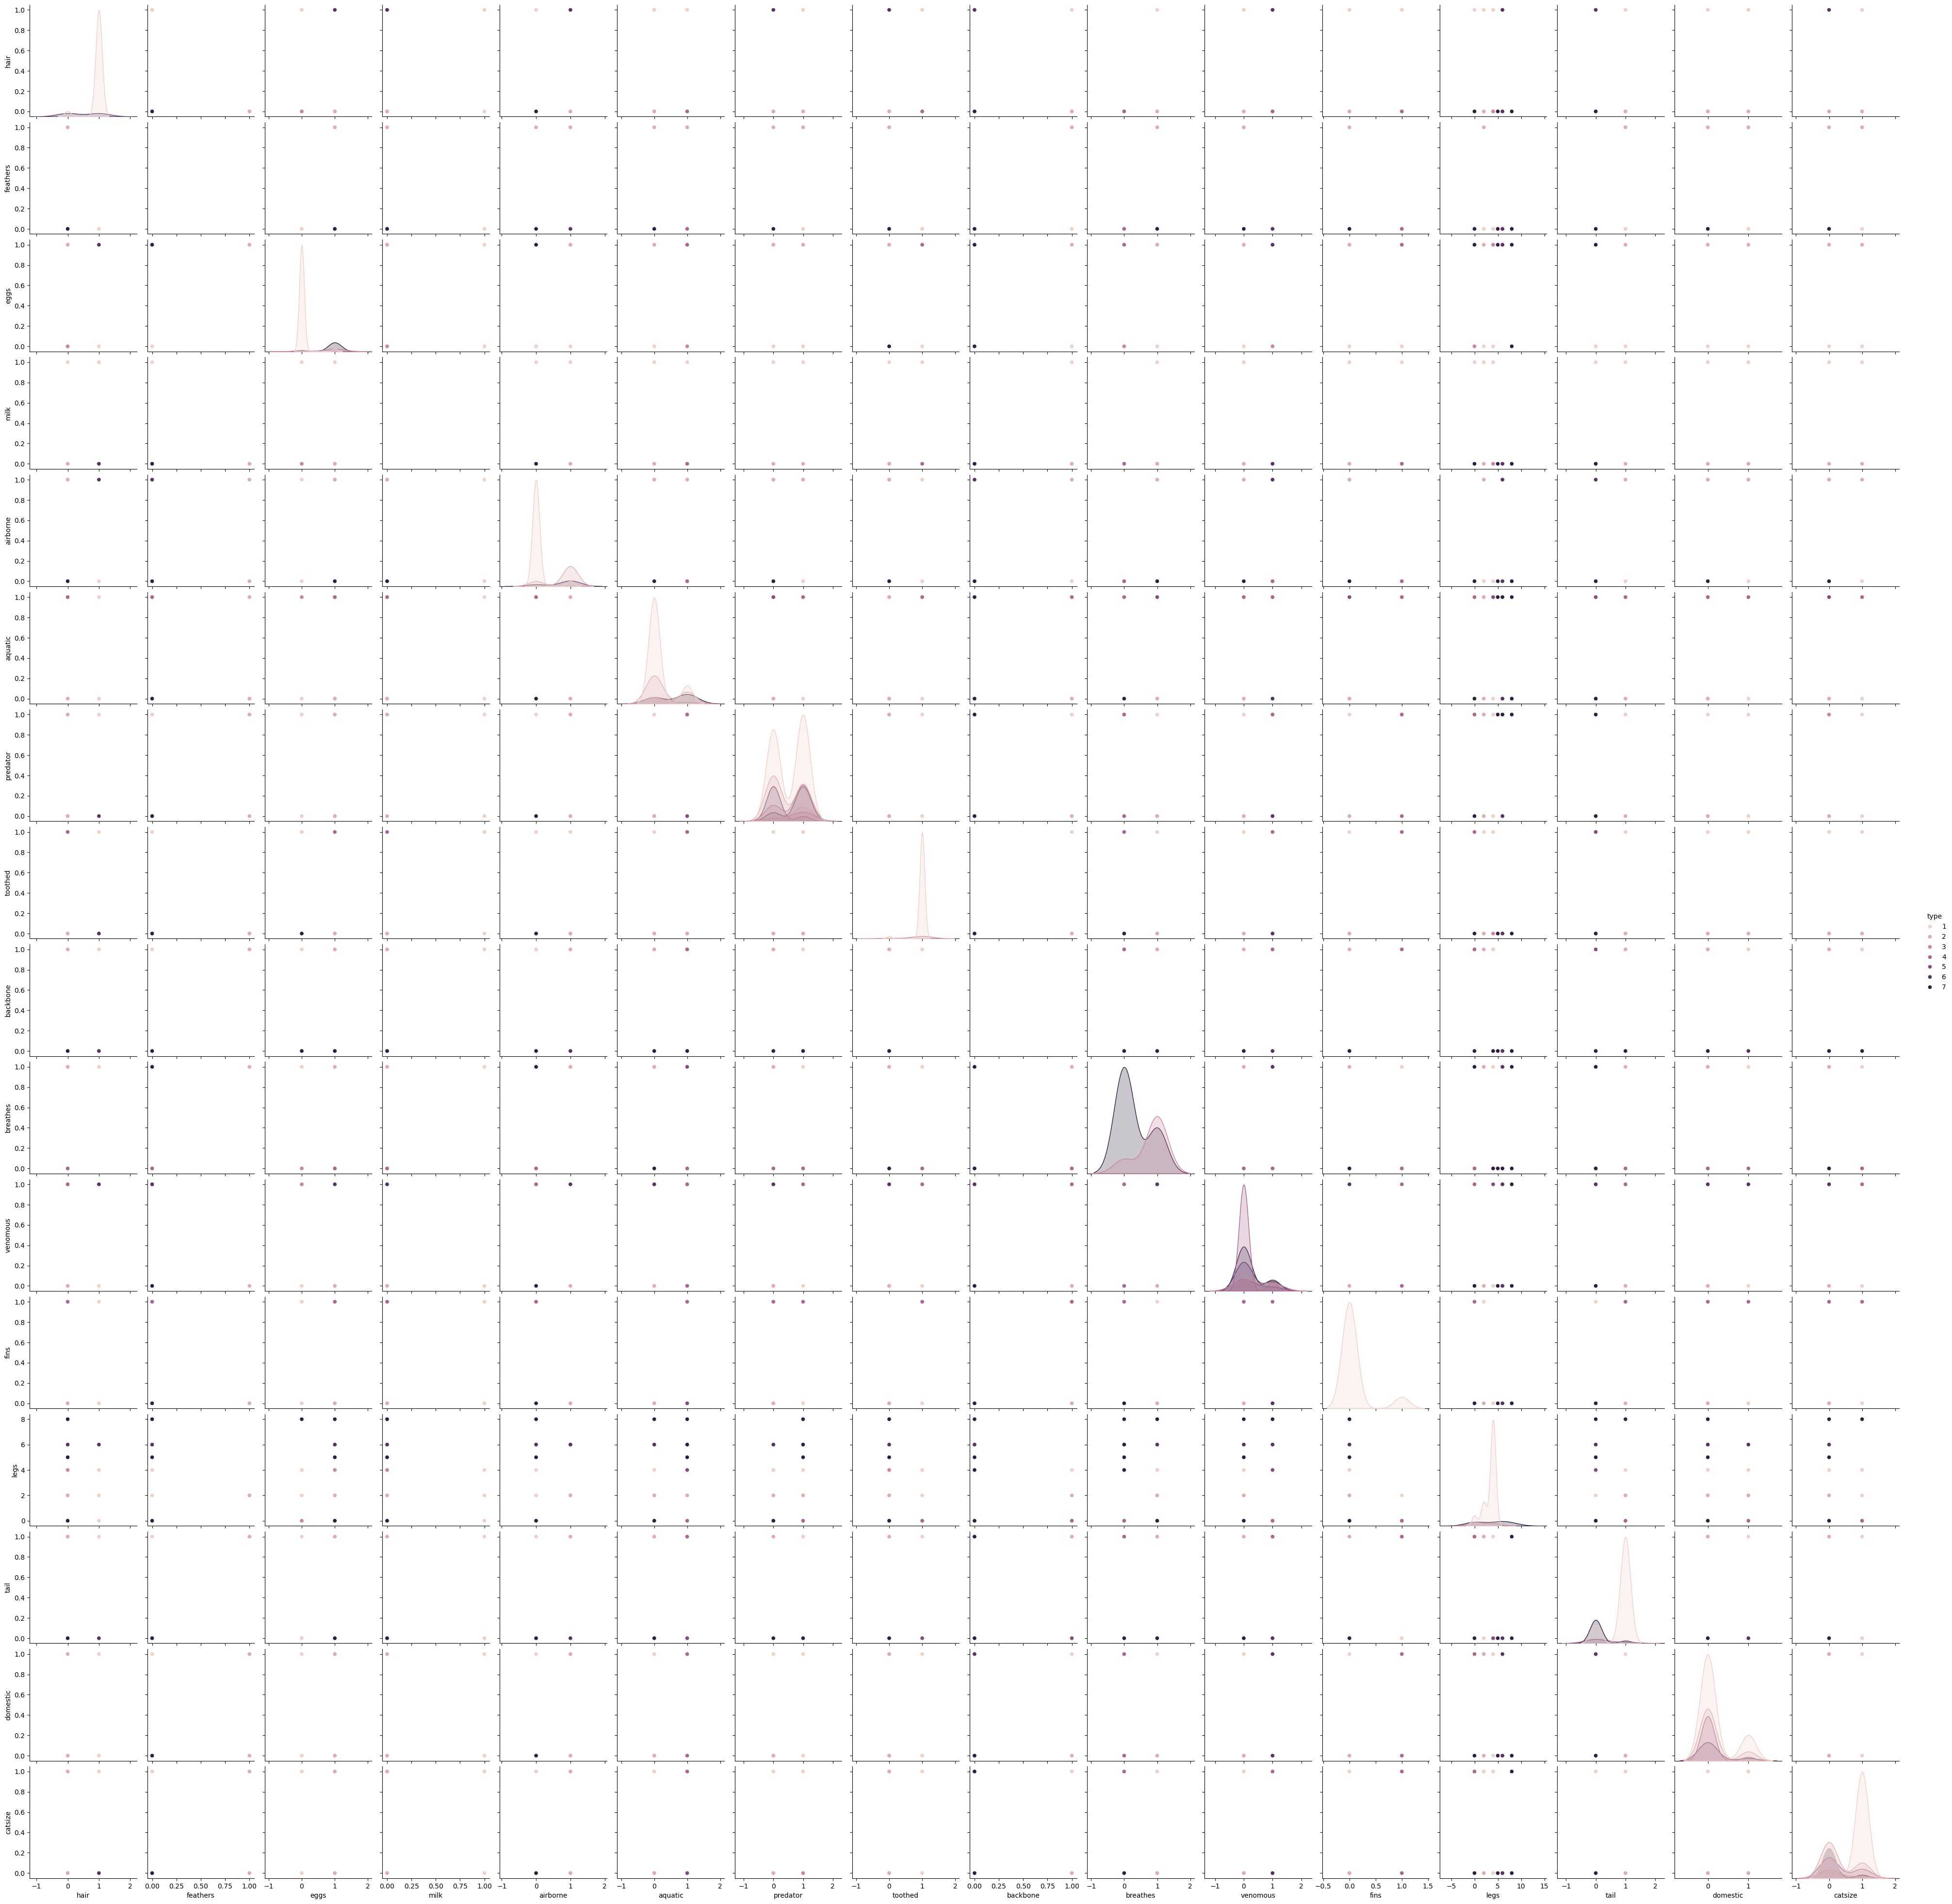

In [7]:
# 1. Analyze the data using visualizations

# Checking for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# a. Visualize pairwise relationships in the dataset
sns.pairplot(df, hue='type')
plt.show()

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object


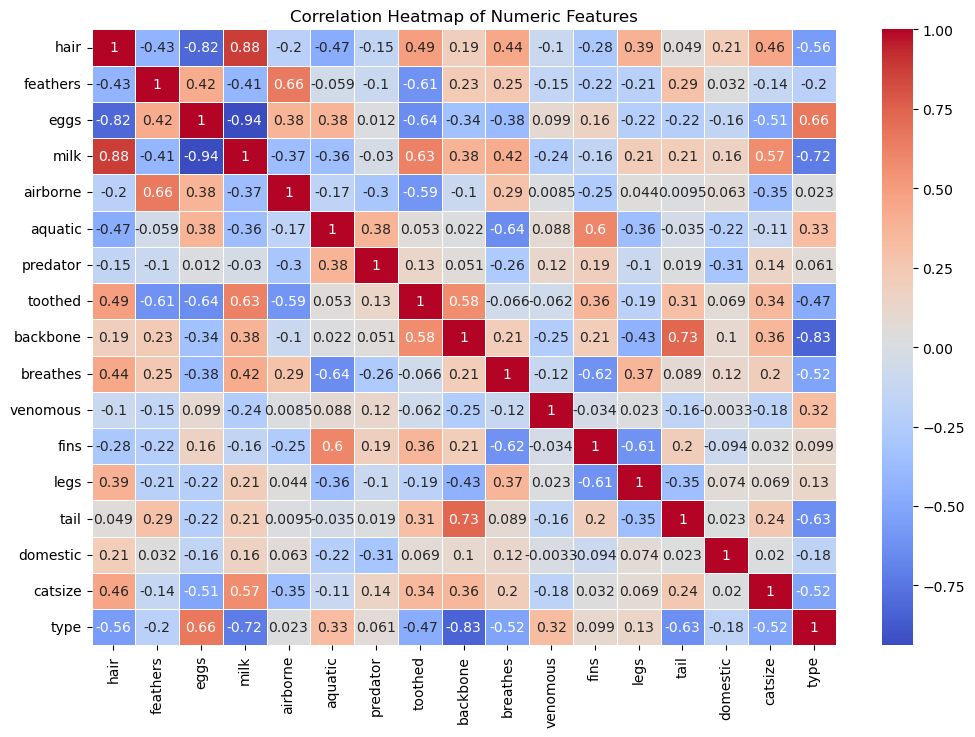

In [8]:
# Checking the data types to see which columns are non-numeric
print(df.dtypes)

# Selecting only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# b. Plotting the correlation heatmap for numeric features
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

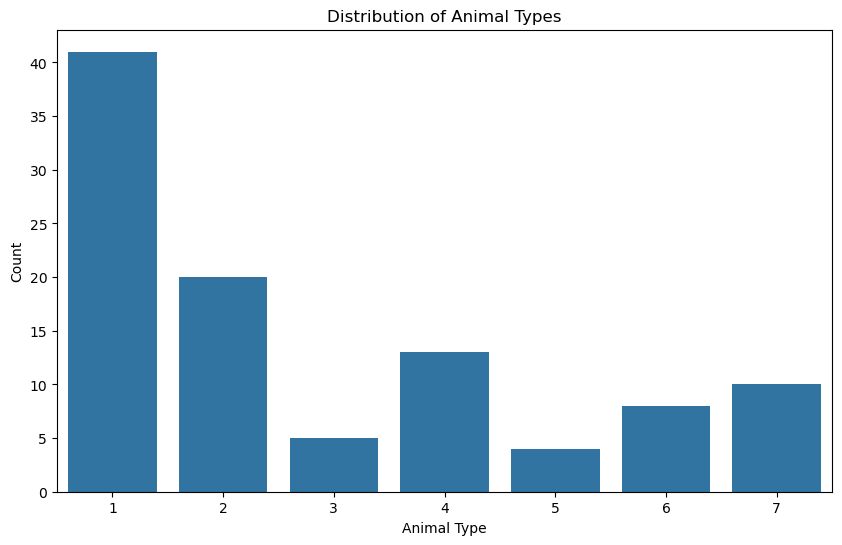

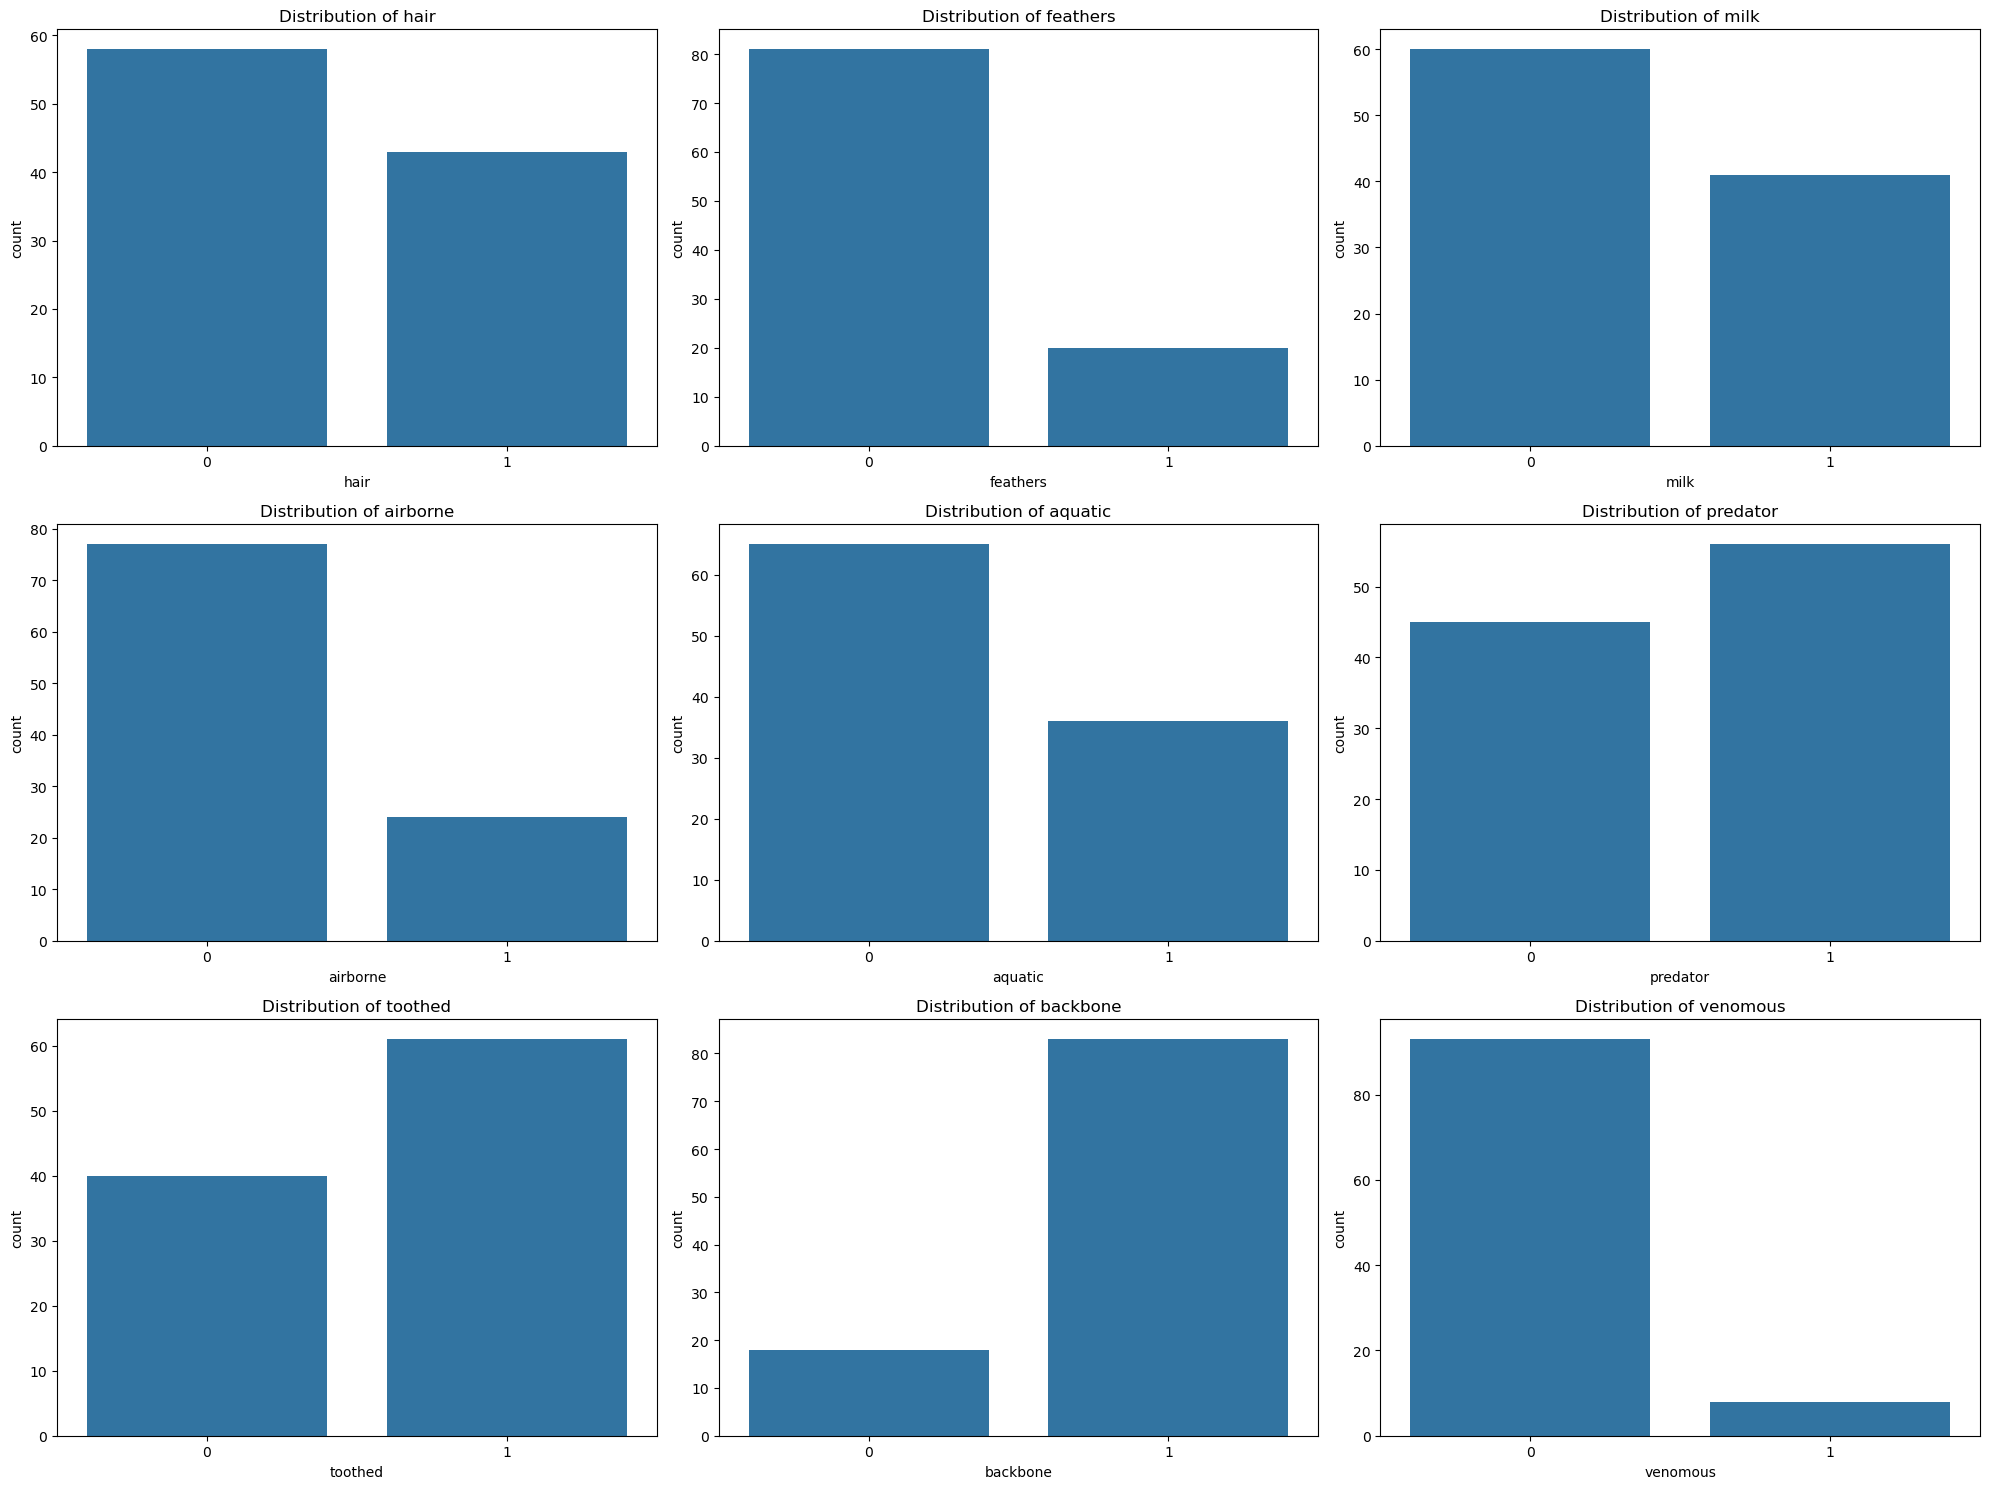

In [33]:
# c. Visualize the distribution of 'type' (target variable)
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df)
plt.title('Distribution of Animal Types')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()

# d. Visualizing binary features like 'hair', 'feathers', 'milk' to see the animal characteristics
binary_features = ['hair', 'feathers', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'venomous']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(binary_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


Checking for missing values:
animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


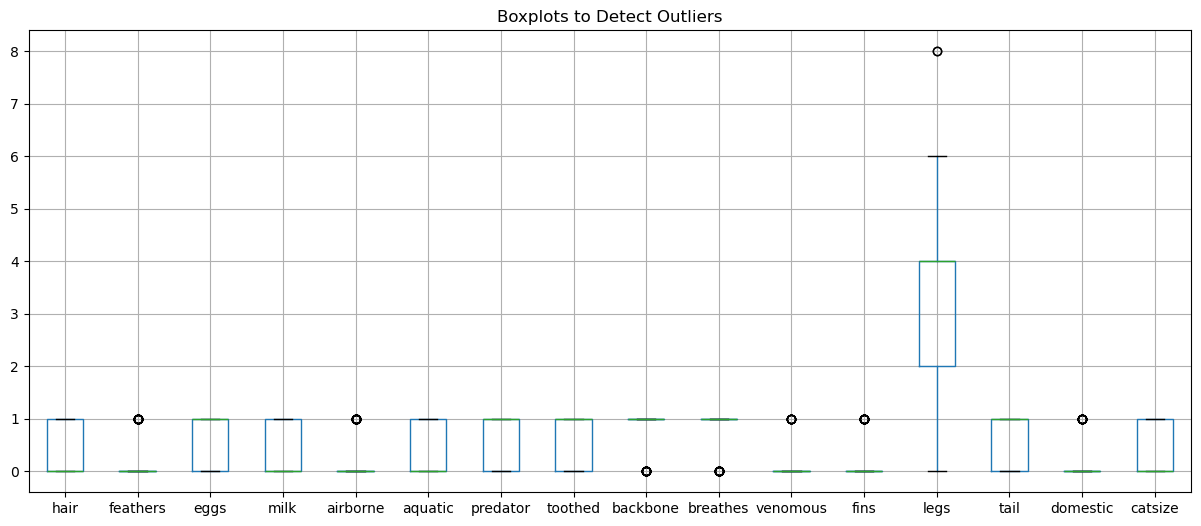

In [16]:
# 2. Preprocess the data by handling missing values & Outliers 
# Check if there are any missing values
print("\nChecking for missing values:")
print(df.isnull().sum())

# Since there are no missing values, we proceed to handle outliers (if necessary)
# Using box plots to detect outliers in numerical features
plt.figure(figsize=(15, 6))
df.drop(columns=['animal name', 'type']).boxplot()
plt.title('Boxplots to Detect Outliers')
plt.show()

In [11]:
# Scaling the features to standardize the data
scaler = StandardScaler()

# Dropping 'animal_name' as it is not useful for classification
X = df.drop(columns=['animal name', 'type'])
y = df['type']

# Scaling the feature set
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.16139451, -0.49690399, -1.18522652, ..., -1.69841555,
        -0.38435306,  1.13818037],
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537],
       ...,
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ..., -1.69841555,
        -0.38435306, -0.87859537],
       [-0.86103386,  2.01246118,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537]])

In [17]:
# 3. Split the dataset into training and testing sets (80% training, 20% testing)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(array([[-0.86103386, -0.49690399,  0.84372057, ..., -1.69841555,
         -0.38435306, -0.87859537],
        [-0.86103386, -0.49690399,  0.84372057, ..., -1.69841555,
         -0.38435306, -0.87859537],
        [-0.86103386, -0.49690399,  0.84372057, ..., -1.69841555,
         -0.38435306, -0.87859537],
        ...,
        [-0.86103386, -0.49690399,  0.84372057, ..., -1.69841555,
         -0.38435306, -0.87859537],
        [-0.86103386, -0.49690399,  0.84372057, ...,  0.58878406,
         -0.38435306,  1.13818037],
        [ 1.16139451, -0.49690399,  0.84372057, ..., -1.69841555,
         -0.38435306, -0.87859537]]),
 array([[ 1.16139451, -0.49690399, -1.18522652,  1.20971676, -0.55829053,
         -0.74420841, -1.1155467 ,  0.80977633,  0.46569032,  0.51234754,
         -0.29329423, -0.44986771, -0.41594766,  0.58878406, -0.38435306,
         -0.87859537],
        [ 1.16139451, -0.49690399, -1.18522652,  1.20971676, -0.55829053,
         -0.74420841, -1.1155467 ,  0.80977633,  0.465

In [18]:
# 4. Implement the K-Nearest Neighbours algorithm

# Initialize the KNN classifier (default K=5)
knn = KNeighborsClassifier()

# Train the model on the training set
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
# 5. Choose an appropriate distance metric and value for K

# To tune hyperparameters, we can manually choose K or use cross-validation, but for now we'll use K=5 (default) and Euclidean distance
# You can later perform cross-validation or GridSearchCV to find the optimal K and distance metric

# Predict on the testing set
y_pred = knn.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 4],
      dtype=int64)

In [22]:
# 6. Evaluate the classifier's performance

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display the results
print("\nEvaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Evaluation Metrics:
Accuracy: 0.9524
Precision: 0.9206
Recall: 0.9524
F1-Score: 0.9333


C:\Users\Kanta. Sai Dhanush\anaconda3\Latest Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



C:\Users\Kanta. Sai Dhanush\anaconda3\Latest Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Kanta. Sai Dhanush\anaconda3\Latest Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Kanta. Sai Dhanush\anaconda3\Latest Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

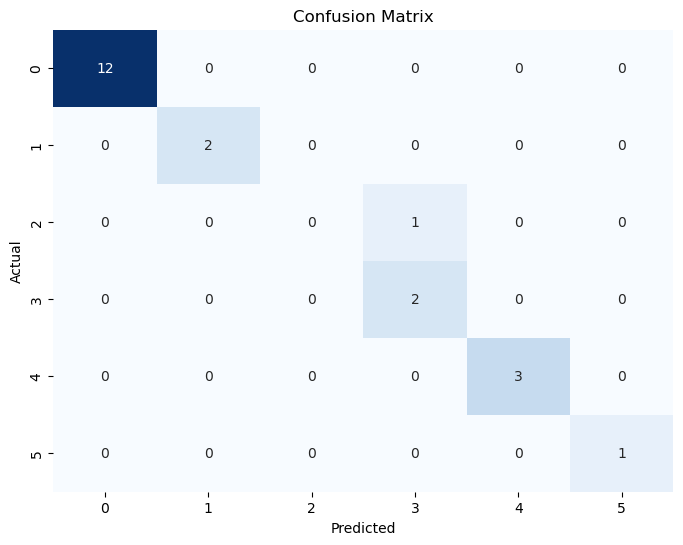

In [27]:
# Displaying classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Displaying confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [28]:
# 7. Visualize the decision boundaries of the classifier

# For visualizing decision boundaries, we need to reduce the feature set to 2D (using only 2 features)
# Here we take 'hair' and 'milk' as sample features for visualization purposes

X_vis = X_train[:, [0, 1]]  # 'hair' and 'milk' features
knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_vis, y_train)

# Define the mesh grid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the boundary
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
Z

array([[5, 5, 5, ..., 1, 1, 1],
       [5, 5, 5, ..., 1, 1, 1],
       [5, 5, 5, ..., 1, 1, 1],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]], dtype=int64)

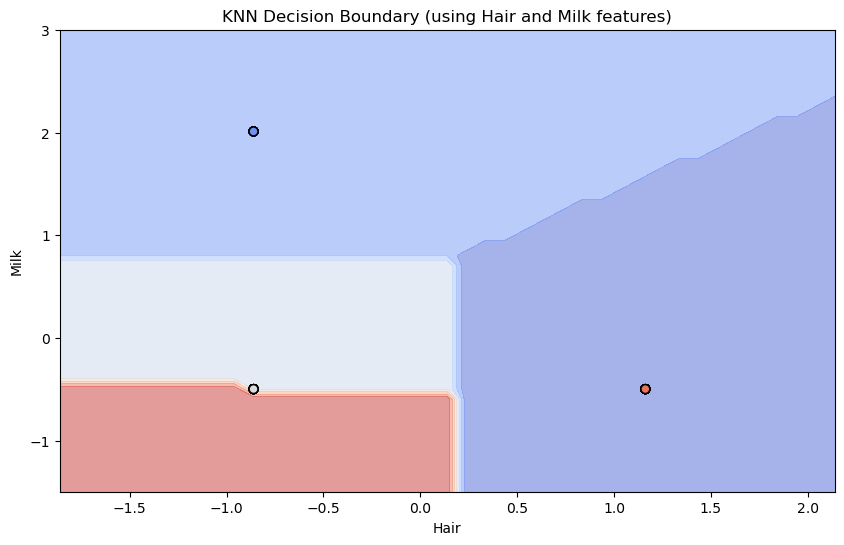

In [29]:
# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_train, s=40, cmap='coolwarm', edgecolor='k')
plt.title('KNN Decision Boundary (using Hair and Milk features)')
plt.xlabel('Hair')
plt.ylabel('Milk')
plt.show()

## Interview Questions

### 1. What are the key hyperparameters in KNN?
### Answer:
#### - The key hyperparameters in KNN are:
####   a. K (number of neighbors): This controls the number of nearest neighbors are considered for classification.
####   b. Distance metric: This defines how the distance between neighbors is calculated (ex: Euclidean, Manhattan).

### 2. What distance metrics can be used in KNN?
### Answer:
#### - Common distance metrics used in KNN include:
####   a. Euclidean distance
####   b. Manhattan distance
####   c. Minkowski distance (general form of Euclidean and Manhattan)
####   d. Hamming distance (for categorical data)